Assignment 3 (due on 11/22)

Student：万思晨（12332276），Gtihub：Wanxiaochen

批改人：赵淑慧

得分：54/60

In [1]:
import numpy as np
import os as os
import pandas as pd
import xarray as xr
import matplotlib as mpl
from netCDF4 import Dataset 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# PS1. Niño 3.4 index
19/20  
1. Niño 3.4范围正确，计算月度气候态（多年平均每月）的SST，并获取SST距平。10/10
2. 根据厄尔尼诺和拉尼娜事件定义，模仿例图（x轴月尺度时间，y轴温度距平，黑线表示三个月滑动平均的距平值，红柱表示正距平，蓝柱表示负距平，有两种事件的阈值水平线）进行绘图。——正负距平的颜色画反了。9/10

In [2]:
#导入nc文件
Nino = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
Nino

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

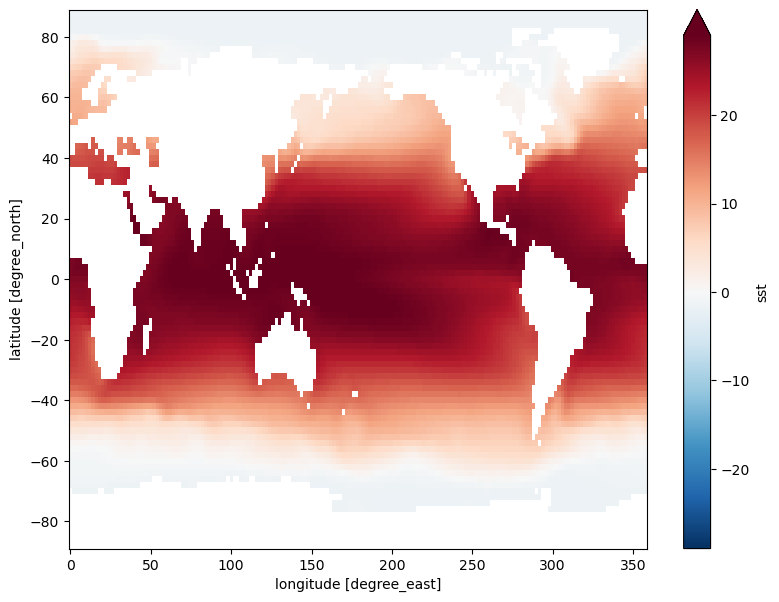

In [3]:
#画图，确定西纬起止点以及转化
Nino.sst.mean(dim='time').plot(size=7, robust=True)

#1.1

In [4]:
#提取Nino数据中符合的地理位置
Nino_sst = Nino['sst'].sel(lat=slice(-5, 5), lon=slice(360-170, 360-120))
Nino_sst

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[28.17175 , 28.048628, ..., 25.169556, 25.033987],
        [27.653809, 27.508678, ..., 24.379114, 24.262102],
        ...,
        [27.31989 , 27.21504 , ..., 25.088928, 25.041584],
        [27.475496, 27.433014, ..., 26.237955, 26.236437]],

       [[28.002878, 27.878937, ..., 25.72304 , 25.661585],
        [27.38209 , 27.24077 , ..., 24.979416, 24.945719],
        ...,
        [26.900671, 26.78532 , ..., 25.587357, 25.581785],
        [27.096472, 27.03789 , ..., 26.4975  , 26.526644]],

       ...,

       [[28.323105, 28.131817, ..., 24.703949, 24.638456],
        [27.4362  , 27.216879, ..., 23.6218  , 23.572655],
        ...,
        [27.244932, 27.02486 , ..., 24.387613, 24.339931],
        [28.00594 , 27.82021 , ..., 25.781157, 25.78427 ]],

       [[28.438414, 28.248383, ..., 24.926899, 24.863983],
        [27.542393, 27.319422, ..., 23.925642, 23.895918],
        ...,
        [27.204172, 26.961138, ..., 24.585806, 24.587051],
        [27.795042, 27.592173, ..., 25.872791, 25.903019]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Attributes:
    pointwidth:          1.0
    valid_min:           -3.0
    valid_max:           45.0
    units:               degree_Celsius
    long_name:           Extended reconstructed sea surface temperature
    standard_name:       sea_surface_temperature
    iridl:hasSemantics:  iridl:SeaSurfaceTemperature

In [5]:
#计算月度平均值
monthly_climatology = Nino_sst.groupby('time.month').mean(dim='time')
monthly_climatology

<xarray.DataArray 'sst' (month: 12, lat: 5, lon: 26)>
array([[[28.603327, 28.46709 , 28.329628, ..., 25.547432, 25.407318,
         25.278002],
        [28.066399, 27.915398, 27.768072, ..., 25.050482, 24.91376 ,
         24.782074],
        [27.704035, 27.550066, 27.402925, ..., 24.939613, 24.821255,
         24.694103],
        [27.733974, 27.594133, 27.458607, ..., 25.548328, 25.472971,
         25.376846],
        [27.979864, 27.871954, 27.765362, ..., 26.36988 , 26.3484  ,
         26.305618]],

       [[28.540337, 28.406334, 28.285015, ..., 26.240774, 26.166866,
         26.114462],
        [27.93303 , 27.779905, 27.645334, ..., 25.759432, 25.692144,
         25.656687],
        [27.53061 , 27.37174 , 27.229572, ..., 25.599237, 25.549782,
         25.52225 ],
        [27.580507, 27.433657, 27.294996, ..., 26.10608 , 26.09529 ,
         26.081562],
        [27.879517, 27.76656 , 27.654293, ..., 26.763283, 26.789177,
...
         24.778183],
        [28.425577, 28.266651, 28.103579, ..., 24.558685, 24.39087 ,
         24.227642],
        [28.132467, 27.965519, 27.80641 , ..., 24.439455, 24.283432,
         24.136156],
        [28.2473  , 28.10055 , 27.961477, ..., 25.181112, 25.047338,
         24.929998],
        [28.58302 , 28.475353, 28.364399, ..., 26.244923, 26.143816,
         26.065308]],

       [[28.796284, 28.663803, 28.517038, ..., 25.248241, 25.07334 ,
         24.901867],
        [28.310251, 28.154438, 27.991566, ..., 24.703024, 24.541676,
         24.376198],
        [27.975597, 27.812155, 27.65246 , ..., 24.582592, 24.43548 ,
         24.279617],
        [28.0253  , 27.881811, 27.743273, ..., 25.26573 , 25.148493,
         25.024502],
        [28.281471, 28.174547, 28.068707, ..., 26.240398, 26.173206,
         26.10181 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    pointwidth:          1.0
    valid_min:           -3.0
    valid_max:           45.0
    units:               degree_Celsius
    long_name:           Extended reconstructed sea surface temperature
    standard_name:       sea_surface_temperature
    iridl:hasSemantics:  iridl:SeaSurfaceTemperature

In [6]:
#计算每月异常值
anomalies = Nino_sst.groupby('time.month') - monthly_climatology
anomalies

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.43157768, -0.41846275, -0.39795303, ..., -0.2116642 ,
         -0.23776245, -0.24401474],
        [-0.41259003, -0.4067192 , -0.3875141 , ..., -0.52064896,
         -0.5346451 , -0.51997185],
        [-0.40932274, -0.39743805, -0.36237717, ..., -0.6373882 ,
         -0.6171951 , -0.583725  ],
        [-0.4140854 , -0.37909317, -0.3215618 , ..., -0.43292618,
         -0.38404274, -0.3352623 ],
        [-0.5043678 , -0.43894005, -0.3710251 , ..., -0.17453575,
         -0.11044502, -0.06918144]],

       [[-0.5374584 , -0.52739716, -0.50823593, ..., -0.40254593,
         -0.44382668, -0.45287704],
        [-0.55093956, -0.539135  , -0.51673317, ..., -0.6660595 ,
         -0.7127285 , -0.710968  ],
        [-0.61242104, -0.5959244 , -0.5572338 , ..., -0.7235069 ,
         -0.7326374 , -0.73106194],
        [-0.6798363 , -0.6483364 , -0.5889931 , ..., -0.5397434 ,
         -0.50793266, -0.49977684],
        [-0.7830448 , -0.7286701 , -0.6683655 , ..., -0.33967972,
...
         -0.2555828 , -0.13972664],
        [-0.989378  , -1.0497723 , -1.0954857 , ..., -0.86087227,
         -0.7690697 , -0.65498734],
        [-1.1887245 , -1.252285  , -1.3029232 , ..., -1.0460625 ,
         -0.9661274 , -0.8785801 ],
        [-1.002367  , -1.0756893 , -1.1325111 , ..., -0.7207298 ,
         -0.6597252 , -0.5900669 ],
        [-0.5770798 , -0.65514374, -0.72174263, ..., -0.4353485 ,
         -0.36265945, -0.28103828]],

       [[-0.3578701 , -0.41542053, -0.47110367, ..., -0.2400589 ,
         -0.1464405 , -0.03788376],
        [-0.7678585 , -0.83501625, -0.9024124 , ..., -0.727829  ,
         -0.61603355, -0.48027992],
        [-0.96187973, -1.0445309 , -1.1224213 , ..., -0.9327831 ,
         -0.81235695, -0.6655674 ],
        [-0.82112694, -0.9206734 , -1.0085506 , ..., -0.6531601 ,
         -0.5626869 , -0.4374504 ],
        [-0.4864292 , -0.5823746 , -0.6702862 , ..., -0.36221695,
         -0.30041504, -0.1987915 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

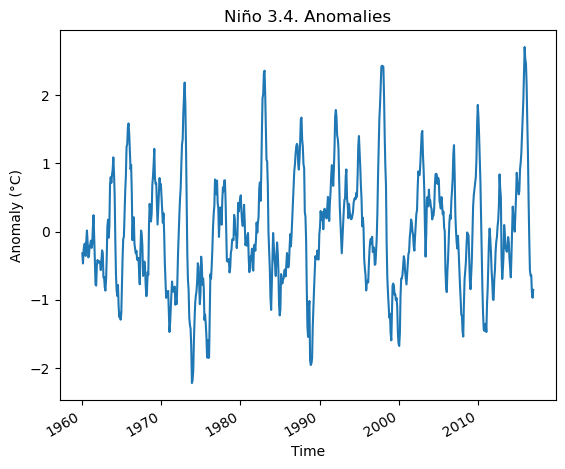

In [7]:
anomalies.mean(dim=('lat', 'lon')).plot()
plt.title('Niño 3.4. Anomalies')
plt.xlabel('Time')
plt.ylabel('Anomaly (°C)')
plt.show()

#1.2

In [8]:
 #计算滑动平均
running_mean = anomalies.rolling(time=3, center=True).mean()
running_mean
Nino34 = running_mean.mean(dim=('lat', 'lon'))
Nino34

<xarray.DataArray 'sst' (time: 684)>
array([            nan, -3.52084458e-01, -3.07880342e-01, -2.10905358e-01,
       -2.40751237e-01, -2.25752324e-01, -1.61667585e-01, -9.31777507e-02,
       -1.72475919e-01, -2.97659367e-01, -3.16484630e-01, -2.53687680e-01,
       -1.78151906e-01, -1.88711420e-01, -1.86596021e-01, -1.24528855e-01,
        3.53904888e-02,  7.36534074e-02, -8.32166523e-02, -4.22450304e-01,
       -6.63132191e-01, -6.88997149e-01, -5.68660975e-01, -4.52793658e-01,
       -4.39344198e-01, -4.45585757e-01, -4.52967823e-01, -4.89164621e-01,
       -4.86114919e-01, -4.22713727e-01, -3.40273380e-01, -4.22365457e-01,
       -5.52163184e-01, -7.18995333e-01, -7.83104539e-01, -7.94865191e-01,
       -6.41309321e-01, -3.29604626e-01, -3.80055569e-02,  5.07842526e-02,
        5.32148145e-02,  2.24629447e-01,  5.19940317e-01,  7.31959879e-01,
        7.80829549e-01,  8.18588138e-01,  9.42891121e-01,  9.48659420e-01,
        8.20278585e-01,  4.14803028e-01, -8.05035979e-02, -5.42296648e-01,
       -8.14098179e-01, -8.64035726e-01, -9.41489458e-01, -1.04434597e+00,
       -1.17956471e+00, -1.24543571e+00, -1.22886264e+00, -1.09325039e+00,
       -7.85493910e-01, -4.21428680e-01, -1.85974061e-01,  2.63800416e-02,
        2.60963857e-01,  5.57179213e-01,  8.80411029e-01,  1.10922527e+00,
        1.34667170e+00,  1.46171641e+00,  1.51624572e+00,  1.40011132e+00,
        1.17662656e+00,  1.02090573e+00,  8.11615705e-01,  4.64977086e-01,
        1.96570203e-01,  8.32045078e-02,  6.70785531e-02, -7.60371238e-02,
...
       -1.36052823e+00, -1.42086625e+00, -1.39447236e+00, -1.39999533e+00,
       -1.29381716e+00, -1.12894547e+00, -8.00049424e-01, -4.95401353e-01,
       -1.95671916e-01, -7.09553286e-02, -1.23575971e-01, -3.31627548e-01,
       -5.43009937e-01, -7.74967730e-01, -9.15227175e-01, -9.00123179e-01,
       -7.56498337e-01, -5.23007095e-01, -3.39979976e-01, -1.79406539e-01,
       -5.35964072e-02,  5.45679405e-02,  2.09609374e-01,  4.63138252e-01,
        6.14878237e-01,  6.54001176e-01,  2.47433737e-01, -1.93644047e-01,
       -5.42674124e-01, -5.37452638e-01, -2.73814023e-01, -1.03850834e-01,
       -5.96894324e-02, -1.80341557e-01, -2.66226739e-01, -2.59480625e-01,
       -1.97789744e-01, -1.51552990e-01, -2.10533813e-01, -3.62679362e-01,
       -5.33728540e-01, -5.30208886e-01, -3.43386948e-01,  1.87203521e-03,
        1.98364228e-01,  2.20234156e-01,  9.81737003e-02,  1.13682605e-01,
        2.57233649e-01,  5.44580996e-01,  7.00828791e-01,  7.35657215e-01,
        6.30336583e-01,  5.86939633e-01,  6.80745661e-01,  8.33929539e-01,
        1.01701725e+00,  1.18350756e+00,  1.40075278e+00,  1.65811932e+00,
        1.96469998e+00,  2.31362391e+00,  2.51594186e+00,  2.56193399e+00,
        2.37545586e+00,  2.07421207e+00,  1.63727725e+00,  1.07768452e+00,
        5.00944257e-01, -7.18474463e-02, -4.42458987e-01, -6.18387520e-01,
       -7.28147447e-01, -8.35824132e-01, -9.07570124e-01,             nan],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

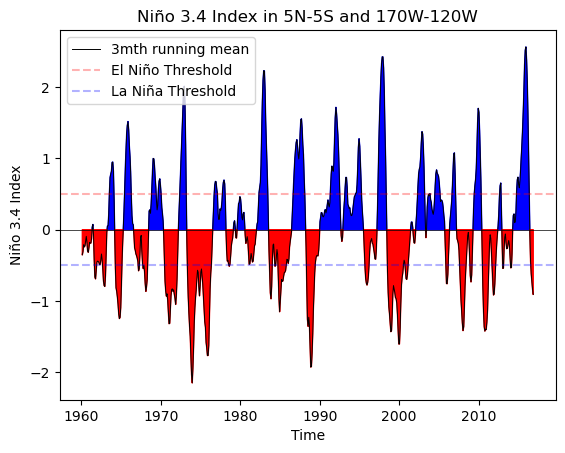

In [9]:
fig, ax = plt.subplots()
ax.plot(Nino34.time, Nino34, color='black', linewidth=0.7, label='3mth running mean')
ax.fill_between(Nino34.time, 0, Nino34, where=(Nino34 > 0), color='blue', interpolate=True)
ax.fill_between(Nino34.time, 0, Nino34, where=(Nino34 < 0), color='red', interpolate=True)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axhline(y=0.5, color='red', linestyle='--', label='El Niño Threshold', alpha=0.3)
plt.axhline(y=-0.5, color='blue', linestyle='--', label='La Niña Threshold', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Niño 3.4 Index')
plt.title('Niño 3.4 Index in 5N-5S and 170W-120W')
plt.legend()
plt.show()

# PS2. Earth’s energy budget
24/30  
1. 绘制按时间平均的全天况下的TOA长波、短波、太阳辐射的2D图，将三者加和并可视化确认他们的和与TOA净通量相等。——部分图缺少图名和变量单位。4/5
2. 计算并确认TOA入射太阳辐射、出射长波、出射短波与示例图中的信息相符合，注意计算每个格网的实际面积。——解释得很详细。10+1/10
3. 计算并绘制每1度纬度带上的净辐射总量，注意正确的单位。——要求计算辐射总量，需乘上面积，结果单位为W。3/5
4. 计算并绘制低云区和高云区的按时间平均的出射短波和长波辐射的2D合成图。注意低云区和高云区的定义。——云覆盖情况与辐射量是一一对应的，故应先筛选低云或高云区再按时间平均，见参考代码；图中缺少变量单位。3/5
5. 计算在高云区和低云区合成的短波和长波辐射的总体平均值，并回答云层对短波和长波辐射的总体影响是怎样的？——2.4的计算思路错误导致2.5的结论有误，见参考代码。3/5

In [10]:
#导入nc文件
TOA = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
TOA

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

#2.1

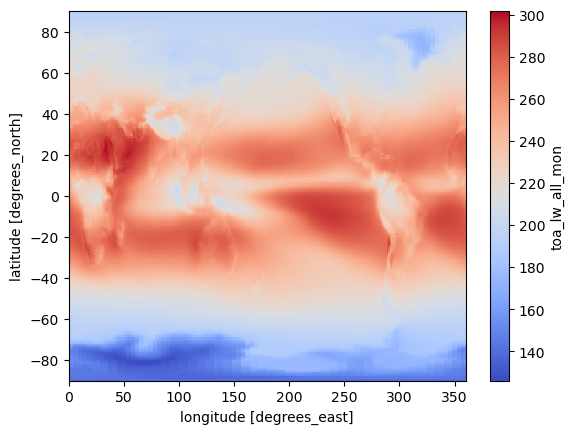

In [11]:
#长波辐射平均
toa_lw_mean = TOA['toa_lw_all_mon'].mean(dim='time')
toa_lw_mean
toa_lw_mean.plot(cmap='coolwarm', add_colorbar=True)

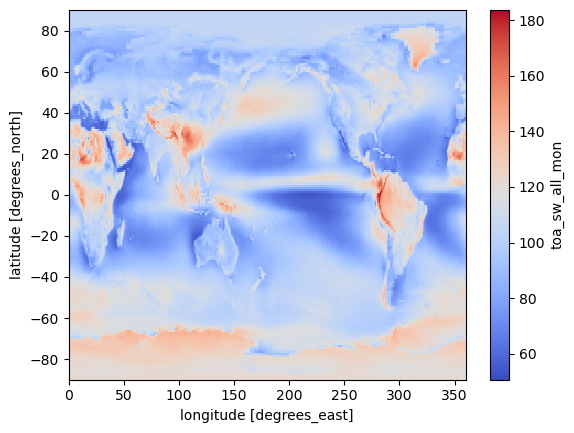

In [12]:
#短波辐射平均
toa_sw_mean = TOA['toa_sw_all_mon'].mean(dim='time')
toa_sw_mean
toa_sw_mean.plot(cmap='coolwarm', add_colorbar=True)

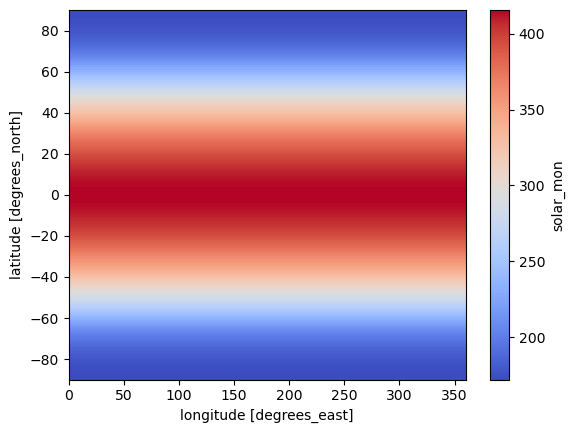

In [13]:
#太阳辐射平均
solar_mean = TOA['solar_mon'].mean(dim='time')
solar_mean
solar_mean.plot(cmap='coolwarm', add_colorbar=True)

In [14]:
#利用太阳辐射-长波-短波计算净辐射总和
toa_net_cl_mean = solar_mean - toa_lw_mean - toa_sw_mean
toa_net_cl_mean

<xarray.DataArray (lat: 180, lon: 360)>
array([[ -91.28782,  -91.28782,  -91.28782, ...,  -91.28782,  -91.28782,
         -91.28782],
       [ -91.45692,  -91.45692,  -91.45692, ...,  -91.45692,  -91.45692,
         -91.45692],
       [ -91.82563,  -91.82563,  -91.82563, ...,  -91.82563,  -91.82563,
         -91.82563],
       ...,
       [-125.81955, -125.81955, -125.81955, ..., -125.81955, -125.81955,
        -125.81955],
       [-125.93744, -125.93744, -125.93744, ..., -125.93744, -125.93744,
        -125.93744],
       [-126.26439, -126.26439, -126.26439, ..., -126.26439, -126.26439,
        -126.26439]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [15]:
#净辐射平均
toa_net_ob_mean = TOA['toa_net_all_mon'].mean(dim='time')
toa_net_ob_mean

<xarray.DataArray 'toa_net_all_mon' (lat: 180, lon: 360)>
array([[ -91.287636,  -91.287636,  -91.287636, ...,  -91.287636,
         -91.287636,  -91.287636],
       [ -91.45633 ,  -91.45633 ,  -91.45633 , ...,  -91.45633 ,
         -91.45633 ,  -91.45633 ],
       [ -91.82986 ,  -91.82986 ,  -91.82986 , ...,  -91.82986 ,
         -91.82986 ,  -91.82986 ],
       ...,
       [-125.825096, -125.825096, -125.825096, ..., -125.825096,
        -125.825096, -125.825096],
       [-125.93955 , -125.93955 , -125.93955 , ..., -125.93955 ,
        -125.93955 , -125.93955 ],
       [-126.26464 , -126.26464 , -126.26464 , ..., -126.26464 ,
        -126.26464 , -126.26464 ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

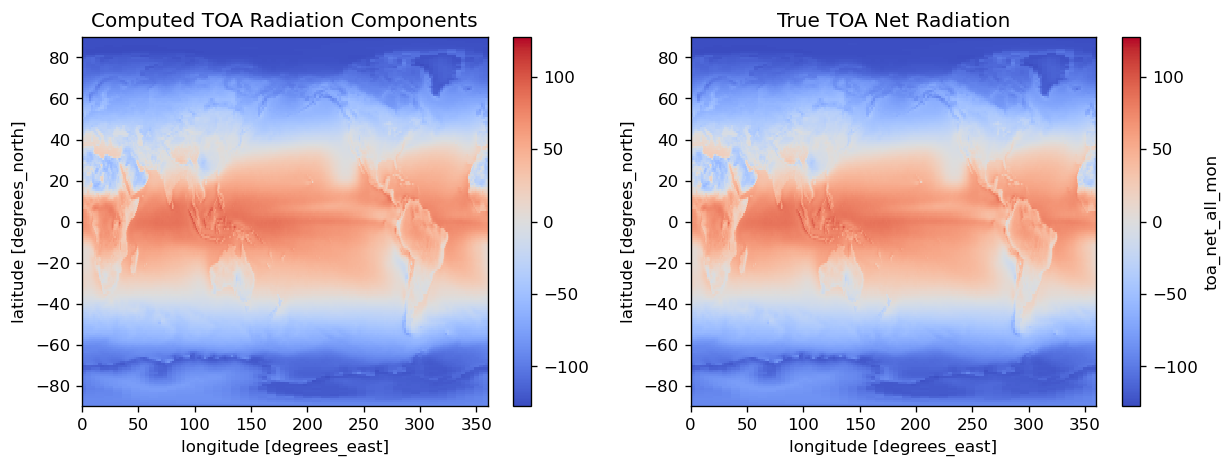

In [16]:
fig = plt.figure(figsize=(12, 4), dpi=120)
grid = plt.GridSpec(1, 2)

ax1 = plt.subplot(grid[0, 0])
ax1 = toa_net_cl_mean.plot(ax=ax1, cmap='coolwarm', add_colorbar=True)
plt.title('Computed TOA Radiation Components')

ax2 = plt.subplot(grid[0, 1])
ax2 = toa_net_ob_mean.plot(ax=ax2, cmap='coolwarm', add_colorbar=True)
plt.title('True TOA Net Radiation')

plt.show()

#2.2

In [17]:
#定义地球半径长度
earth_radius = 6371000
#lon和lat分别为经度和纬度的数据
lon = TOA['lon'].values
lat = TOA['lat'].values

In [18]:
#创建经度和纬度的网格
xlon, ylat = np.meshgrid(lon, lat)
#计算经纬度的差分
dlony, dlonx = np.gradient(xlon)
dlaty, dlatx = np.gradient(ylat)
pi = 3.14159265
#计算经纬度的距离
dx = earth_radius * np.cos(ylat * pi/180) * dlonx * pi/180
dy = earth_radius * dlaty * pi/180

In [19]:
#利用经纬度的距离计算面积
grid_area = dx * dy
grid_area

array([[1.07897926e+08, 1.07897926e+08, 1.07897926e+08, ...,
        1.07897926e+08, 1.07897926e+08, 1.07897926e+08],
       [3.23660521e+08, 3.23660521e+08, 3.23660521e+08, ...,
        3.23660521e+08, 3.23660521e+08, 3.23660521e+08],
       [5.39323050e+08, 5.39323050e+08, 5.39323050e+08, ...,
        5.39323050e+08, 5.39323050e+08, 5.39323050e+08],
       ...,
       [5.39323050e+08, 5.39323050e+08, 5.39323050e+08, ...,
        5.39323050e+08, 5.39323050e+08, 5.39323050e+08],
       [3.23660521e+08, 3.23660521e+08, 3.23660521e+08, ...,
        3.23660521e+08, 3.23660521e+08, 3.23660521e+08],
       [1.07897926e+08, 1.07897926e+08, 1.07897926e+08, ...,
        1.07897926e+08, 1.07897926e+08, 1.07897926e+08]])

In [20]:
#计算长波辐射、短波辐射和太阳辐射的时间平均值
toa_lw_mean = TOA['toa_lw_all_mon'].mean(dim='time')
toa_sw_mean = TOA['toa_sw_all_mon'].mean(dim='time')
solar_mean = TOA['solar_mon'].mean(dim='time')

In [21]:
#假设grid_area是一个NumPy数组，且TOA['lat']和TOA['lon']是包含纬度和经度的数据
grid_area_da = xr.DataArray(grid_area, dims=["lat", "lon"], coords={"lat": TOA['lat'], "lon": TOA['lon']})

In [22]:
#计算总体辐射平均
toa_lw_mean = (toa_lw_mean * grid_area_da).sum(dim=('lon', 'lat')) / grid_area_da.sum()
toa_sw_mean = (toa_sw_mean * grid_area_da).sum(dim=('lon', 'lat')) / grid_area_da.sum()
solar_mean = (solar_mean * grid_area_da).sum(dim=('lon', 'lat')) / grid_area_da.sum()

In [23]:
print(f"Calculated global mean TOA outgoing longwave radiation: {toa_lw_mean.values} W/m^2")
print(f"Calculated global mean TOA outgoing shortwave radiation: {toa_sw_mean.values} W/m^2")
print(f"Calculated global mean TOA incoming solar radiation: {solar_mean.values} W/m^2")

Calculated global mean TOA outgoing longwave radiation: 240.26798843337824 W/m^2
Calculated global mean TOA outgoing shortwave radiation: 99.13904183833034 W/m^2
Calculated global mean TOA incoming solar radiation: 340.2851326005555 W/m^2


#2.3

In [24]:
#计算每个纬度带的净辐射总量
net_radiation_latitude_band = TOA['toa_net_all_mon'].sum(dim='lon').mean(dim='time')
net_radiation_latitude_band

<xarray.DataArray 'toa_net_all_mon' (lat: 180)>
array([-32863.55   , -32754.941  , -33406.754  , -34123.68   ,
       -35125.89   , -36170.22   , -36712.855  , -36966.535  ,
       -37123.125  , -36972.53   , -36918.504  , -36722.188  ,
       -36248.492  , -36354.832  , -37024.582  , -37327.51   ,
       -37578.88   , -38331.2    , -39061.016  , -39258.31   ,
       -39073.04   , -38946.555  , -38629.59   , -37491.918  ,
       -35919.836  , -34375.418  , -32580.488  , -31072.338  ,
       -29686.898  , -28317.988  , -26528.129  , -25127.55   ,
       -23788.652  , -22525.547  , -21368.922  , -20217.363  ,
       -18905.148  , -17800.812  , -16696.094  , -15537.7295 ,
       -14471.528  , -13379.201  , -12206.66   , -11016.469  ,
        -9804.316  ,  -8671.585  ,  -7473.0464 ,  -6274.7876 ,
        -5092.704  ,  -3924.7278 ,  -2801.0872 ,  -1767.3103 ,
         -629.5722 ,    600.18207,   1677.3834 ,   2582.5344 ,
         3405.4844 ,   4312.3726 ,   4955.7637 ,   5660.71   ,
         6373.379  ,   6991.189  ,   7629.3496 ,   8306.627  ,
         8939.253  ,   9381.521  ,   9951.668  ,  10500.56   ,
        11101.6455 ,  11754.895  ,  12604.358  ,  13339.304  ,
        13993.534  ,  14788.32   ,  15703.959  ,  16562.113  ,
        17400.168  ,  18155.488  ,  19025.129  ,  19817.873  ,
...
        18068.139  ,  16262.448  ,  14712.412  ,  13091.431  ,
        11524.082  ,  10534.132  ,   9751.485  ,   8922.513  ,
         8132.094  ,   7428.6724 ,   6698.068  ,   5778.165  ,
         5042.354  ,   3849.6128 ,   3281.9917 ,   2729.8428 ,
         2058.1023 ,   2217.3936 ,   2097.7632 ,   1874.1953 ,
         1238.5184 ,    489.11276,   -233.05653,  -1228.7716 ,
        -2338.9844 ,  -3596.071  ,  -4711.136  ,  -5721.223  ,
        -6805.095  ,  -8104.018  ,  -9283.299  , -10421.126  ,
       -11568.792  , -12781.685  , -13927.2295 , -14886.011  ,
       -15899.645  , -16996.041  , -18014.72   , -18949.322  ,
       -19847.857  , -20890.191  , -22088.068  , -23002.908  ,
       -23712.895  , -24558.49   , -26001.99   , -27105.535  ,
       -28018.678  , -28942.658  , -30027.201  , -31260.596  ,
       -32144.041  , -33256.156  , -34442.887  , -35582.54   ,
       -36592.78   , -37846.305  , -39053.863  , -39926.598  ,
       -40617.258  , -41138.33   , -41767.562  , -42367.72   ,
       -42997.65   , -43302.168  , -43628.805  , -43761.832  ,
       -44278.42   , -44906.49   , -45143.6    , -45209.56   ,
       -45220.723  , -45299.742  , -45351.113  , -45455.277  ],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

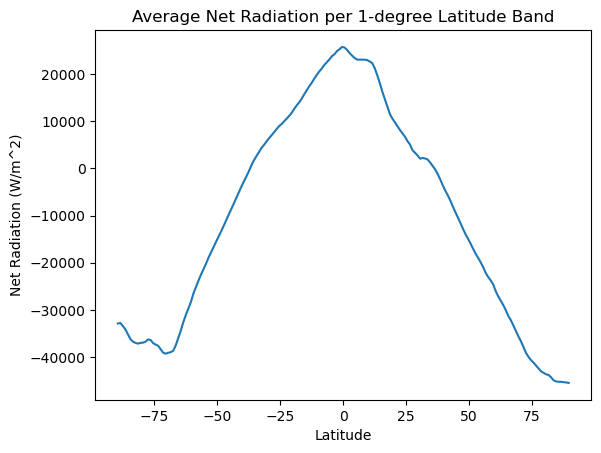

In [25]:
fig, ax = plt.subplots()
net_radiation_latitude_band.plot(ax=ax)
ax.set_xlabel('Latitude')
ax.set_ylabel('Net Radiation (W/m^2)')
plt.title('Average Net Radiation per 1-degree Latitude Band')
plt.show()

#2.4

In [26]:
#阈值区分低云区与高云区
low_cloud_mask = TOA['cldarea_total_daynight_mon'].mean(dim='time') <= 25
high_cloud_mask = TOA['cldarea_total_daynight_mon'].mean(dim='time') >= 75

In [27]:
#根据掩码计算低云区和高云区的平均值
outgoing_sw_low_cloud_mean = TOA['toa_sw_all_mon'].where(low_cloud_mask).mean(dim='time')
outgoing_sw_high_cloud_mean = TOA['toa_sw_all_mon'].where(high_cloud_mask).mean(dim='time')
outgoing_lw_low_cloud_mean = TOA['toa_lw_all_mon'].where(low_cloud_mask).mean(dim='time')
outgoing_lw_high_cloud_mean = TOA['toa_lw_all_mon'].where(high_cloud_mask).mean(dim='time')

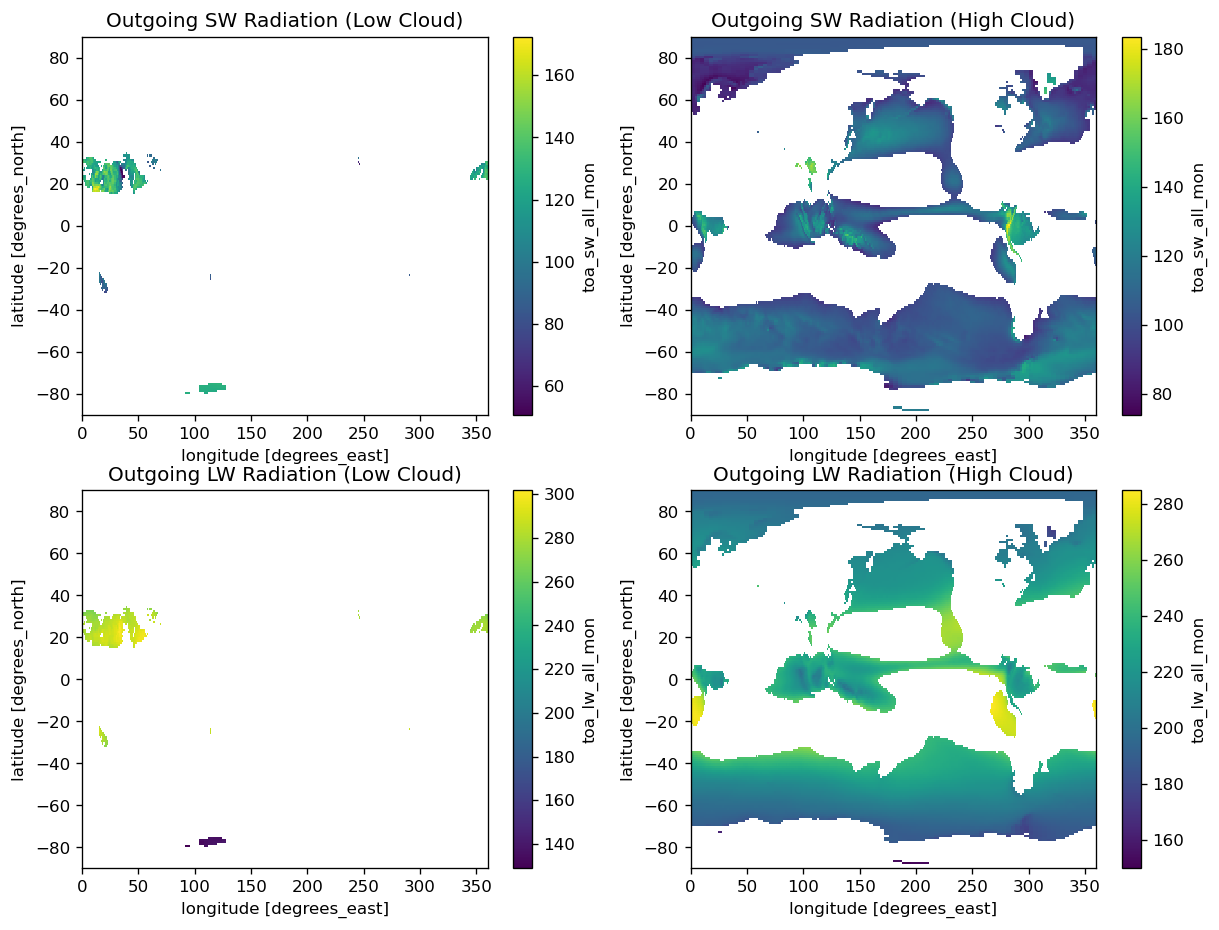

In [28]:
fig = plt.figure(figsize=(12, 9), dpi=120)
grid = plt.GridSpec(2, 2)

ax1 = plt.subplot(grid[0, 0])
ax1 = outgoing_sw_low_cloud_mean.plot(ax=ax1, add_colorbar=True)
plt.title('Outgoing SW Radiation (Low Cloud)')

ax2 = plt.subplot(grid[0, 1])
ax2 = outgoing_sw_high_cloud_mean.plot(ax=ax2, add_colorbar=True)
plt.title('Outgoing SW Radiation (High Cloud)')

ax3 = plt.subplot(grid[1, 0])
ax3 = outgoing_lw_low_cloud_mean.plot(ax=ax3, add_colorbar=True)
plt.title('Outgoing LW Radiation (Low Cloud)')

ax4 = plt.subplot(grid[1, 1])
ax4 = outgoing_lw_high_cloud_mean.plot(ax=ax4, add_colorbar=True)
plt.title('Outgoing LW Radiation (High Cloud)')

plt.show()

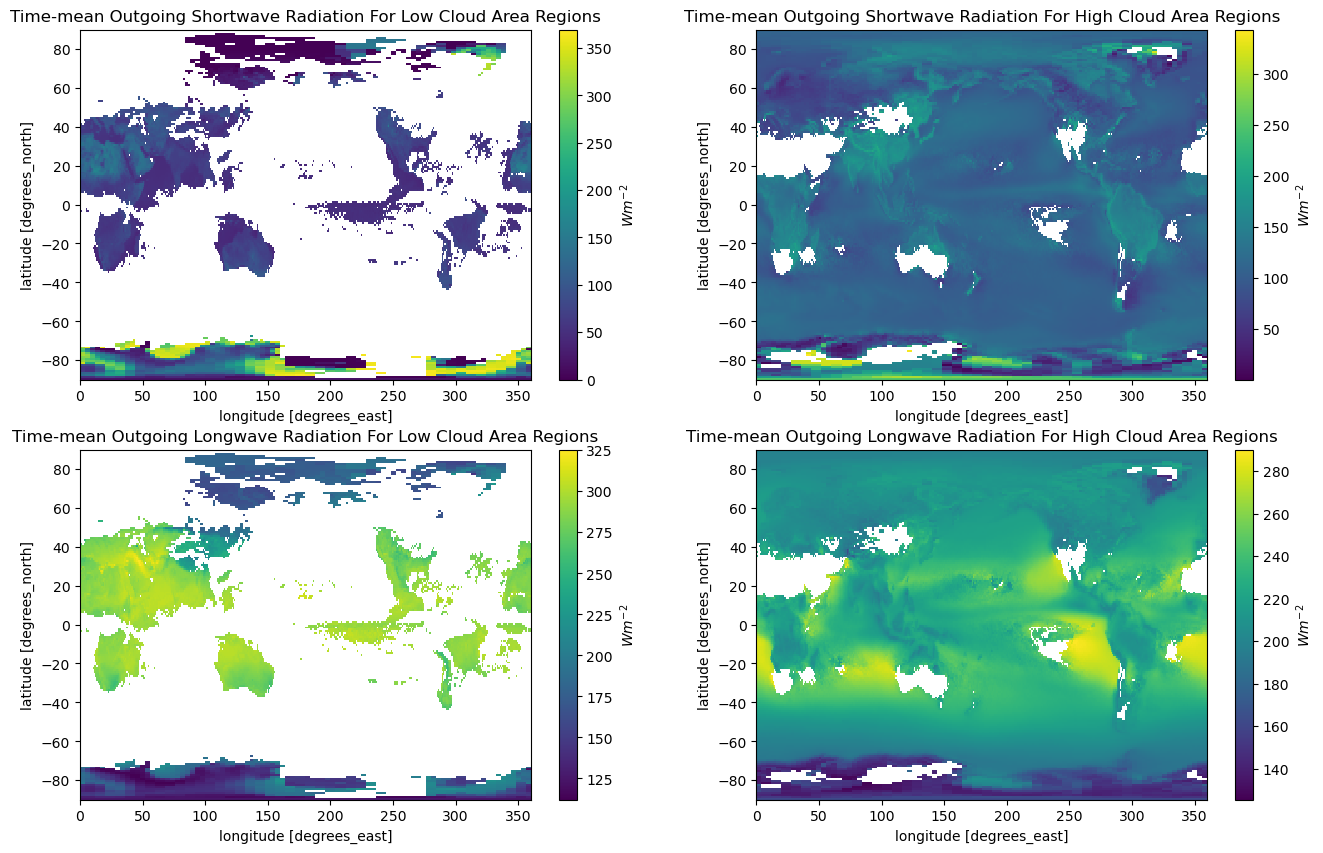

In [35]:
# 参考代码
lc_shortwave=TOA.toa_sw_all_mon.where(TOA.cldarea_total_daynight_mon<=25).mean(dim='time')
hc_shortwave=TOA.toa_sw_all_mon.where(TOA.cldarea_total_daynight_mon>=75).mean(dim='time')

lc_longwave=TOA.toa_lw_all_mon.where(TOA.cldarea_total_daynight_mon<=25).mean(dim='time')
hc_longwave=TOA.toa_lw_all_mon.where(TOA.cldarea_total_daynight_mon>=75).mean(dim='time')
# lc_longwave,hc_longwave

fig,axs =plt.subplots(2,2,figsize=(16,10))
axs=axs.flatten()

fig1=lc_shortwave.plot(ax=axs[0],cbar_kwargs={'label':'${Wm^{-2}}$'})
axs[0].set_title('Time-mean Outgoing Shortwave Radiation For Low Cloud Area Regions')

fig2=hc_shortwave.plot(ax=axs[1],cbar_kwargs={'label':'${Wm^{-2}}$'})
axs[1].set_title('Time-mean Outgoing Shortwave Radiation For High Cloud Area Regions')

fig3=lc_longwave.plot(ax=axs[2],cbar_kwargs={'label':'${Wm^{-2}}$'})
axs[2].set_title('Time-mean Outgoing Longwave Radiation For Low Cloud Area Regions')

fig4=hc_longwave.plot(ax=axs[3],cbar_kwargs={'label':'${Wm^{-2}}$'})
axs[3].set_title('Time-mean Outgoing Longwave Radiation For High Cloud Area Regions')

plt.show()

#2.5

In [29]:
#计算高云区与低云区的网格面积
area_lc = grid_area_da.where(low_cloud_mask)
area_lc
area_hc = grid_area_da.where(high_cloud_mask)
area_hc

<xarray.DataArray (lat: 180, lon: 360)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [5.39323050e+08, 5.39323050e+08, 5.39323050e+08, ...,
        5.39323050e+08, 5.39323050e+08, 5.39323050e+08],
       [3.23660521e+08, 3.23660521e+08, 3.23660521e+08, ...,
        3.23660521e+08, 3.23660521e+08, 3.23660521e+08],
       [1.07897926e+08, 1.07897926e+08, 1.07897926e+08, ...,
        1.07897926e+08, 1.07897926e+08, 1.07897926e+08]])
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

In [30]:
mean = ((outgoing_sw_low_cloud_mean * area_lc).sum(dim=('lat', 'lon'))) / area_lc.sum()
mean

<xarray.DataArray ()>
array(122.55221069)

In [31]:
#计算高云区与低云区长波辐射与短波辐射的所有网格的平均值
low_cloud_sw_mean = ((outgoing_sw_low_cloud_mean * area_lc).sum(dim=('lat', 'lon'))) / area_lc.sum()
low_cloud_lw_mean = ((outgoing_lw_low_cloud_mean * area_lc).sum(dim=('lat', 'lon'))) / area_lc.sum()
high_cloud_sw_mean = ((outgoing_sw_high_cloud_mean * area_hc).sum(dim=('lat', 'lon'))) / area_hc.sum()
high_cloud_lw_mean = ((outgoing_lw_high_cloud_mean * area_hc).sum(dim=('lat', 'lon'))) / area_hc.sum()

In [32]:
print(f"Shortwave Radiation (Low Cloud): {low_cloud_sw_mean.values} W/m^2")
print(f"Longwave Radiation (Low Cloud): {low_cloud_lw_mean.values} W/m^2")
print(f"Shortwave Radiation (High Cloud): {high_cloud_sw_mean.values} W/m^2")
print(f"Longwave Radiation (High Cloud): {high_cloud_lw_mean.values} W/m^2")

Shortwave Radiation (Low Cloud): 122.55221069159758 W/m^2
Longwave Radiation (Low Cloud): 280.6622384665996 W/m^2
Shortwave Radiation (High Cloud): 109.20724972700351 W/m^2
Longwave Radiation (High Cloud): 223.76734150262547 W/m^2


In [33]:
#计算云对短波与长波辐射的影响
sw_cloud_effect = high_cloud_sw_mean - low_cloud_sw_mean
lw_cloud_effect = high_cloud_lw_mean - low_cloud_lw_mean

In [34]:
print(f"The impact of clouds on shortwave radiation: {sw_cloud_effect.values} W/m^2")
print(f"The impact of clouds on longwave radiation: {lw_cloud_effect.values} W/m^2")

The impact of clouds on shortwave radiation: -13.344960964594065 W/m^2
The impact of clouds on longwave radiation: -56.89489696397413 W/m^2


In [37]:
# 参考代码
weights1 = np.cos(np.deg2rad(lc_shortwave.lat))
lc_mean_shortwave=lc_shortwave.weighted(weights1).mean()
hc_mean_shortwave=hc_shortwave.weighted(weights1).mean()
lc_mean_longwave=lc_longwave.weighted(weights1).mean()
hc_mean_longwave=hc_longwave.weighted(weights1).mean()
print(f'The global mean values of shortwave radiation in high and low cloud regions are {hc_mean_shortwave:f} and {lc_mean_shortwave:f} Wm-2 respectively.')
print(f'The global mean values of longwave radiation in high and low cloud regions are {hc_mean_longwave:f} and {lc_mean_longwave:f} Wm-2 respectively.')
print('In high cloud area regions, shortwave radiation is stronger while longwave radiation is weaker, which means clouds would reflect shortwave and reserve longwave.')

The global mean values of shortwave radiation in high and low cloud regions are 113.157120 and 75.494324 Wm-2 respectively.
The global mean values of longwave radiation in high and low cloud regions are 225.708435 and 270.853027 Wm-2 respectively.
In high cloud area regions, shortwave radiation is stronger while longwave radiation is weaker, which means clouds would reflect shortwave and reserve longwave.


# PS3. Explore a netCDF dataset
11/10  
1. 绘制某个变量的时间序列，注意去掉月尺度的季节性周期。——新学了合并nc文件的操作。5+1/5
2. 用该数据集绘制至少5种不同的图。5/5

In [42]:
#批量打开nc文件并合成为一个
folder_path = 'C:/Users/lenovo/Desktop/ESE5023/PS3/downthemall/'
file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.nc4')]
merged_dataset = xr.open_mfdataset(file_list, combine='by_coords')
merged_dataset.to_netcdf('GLDAS_file.nc')

In [2]:
GLDAS = xr.open_dataset("GLDAS_file.nc", engine="netcdf4")
GLDAS

<xarray.Dataset>
Dimensions:                 (time: 120, bnds: 2, lon: 360, lat: 150)
Coordinates:
  * time                    (time) datetime64[ns] 2001-01-01 ... 2010-12-01
  * lon                     (lon) float32 -179.5 -178.5 -177.5 ... 178.5 179.5
  * lat                     (lat) float32 -59.5 -58.5 -57.5 ... 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables: (12/39)
    time_bnds               (time, bnds) datetime64[ns] ...
    Swnet_tavg              (time, lat, lon) float32 ...
    Lwnet_tavg              (time, lat, lon) float32 ...
    Qle_tavg                (time, lat, lon) float32 ...
    Qh_tavg                 (time, lat, lon) float32 ...
    Qg_tavg                 (time, lat, lon) float32 ...
    ...                      ...
    Rainf_f_tavg            (time, lat, lon) float32 ...
    Tair_f_inst             (time, lat, lon) float32 ...
    Qair_f_inst             (time, lat, lon) float32 ...
    Psurf_f_inst            (time, lat, lon) float32 ...
    SWdown_f_tavg           (time, lat, lon) float32 ...
    LWdown_f_tavg           (time, lat, lon) float32 ...
Attributes: (12/19)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                created on date: 2020-09-03T17:17:03.094
    source:                 CLSM_F2.5 forced with Princeton_V2.2
    institution:            NASA GSFC
    missing_value:          -9999.0
    ...                     ...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.5
    SOUTH_WEST_CORNER_LON:  -179.5
    DX:                     1.0
    DY:                     1.0
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

#3.1

In [15]:
#提取气温数据
temperature = GLDAS['Tair_f_inst']
temperature

<xarray.DataArray 'Tair_f_inst' (time: 120, lat: 150, lon: 360)>
[6480000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2010-12-01
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 86.5 87.5 88.5 89.5
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K
    cell_methods:   time: mean
    vmin:           218.35959
    vmax:           307.8321

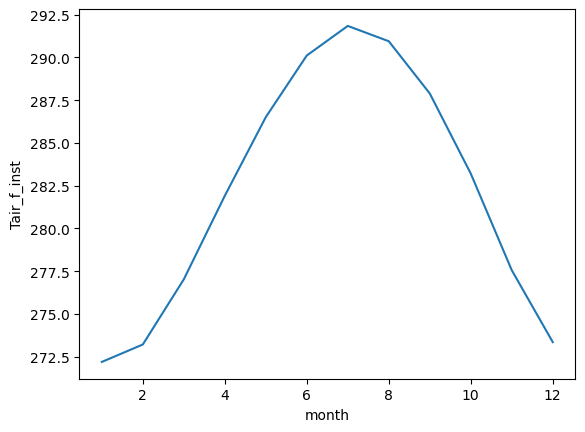

In [16]:
#计算每个月份的平均
temperature_climm = temperature.groupby("time.month").mean()
temperature_climm.mean(dim=['lon','lat']).plot()

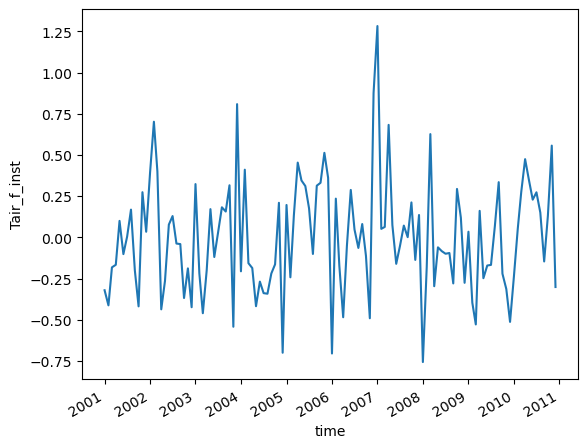

In [22]:
#提取异常值
temperature_mon = temperature.groupby("time.month")
temperature_anomm = temperature_mon - temperature_climm
temperature_anomm.mean(dim=['lon','lat']).plot()

#3.2

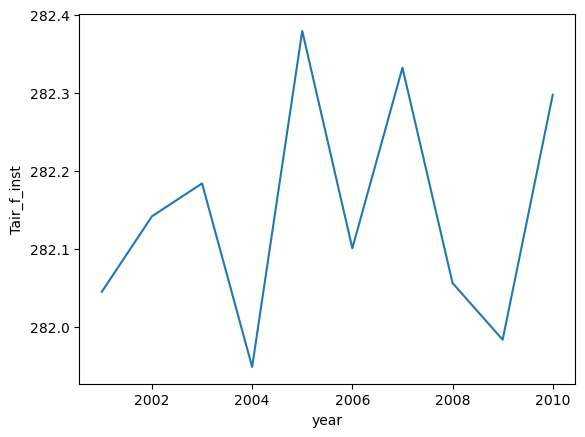

In [18]:
#气温随年份变化
temperature_year=temperature.groupby("time.year").mean()
temperature_year.mean(dim=['lon','lat']).plot()

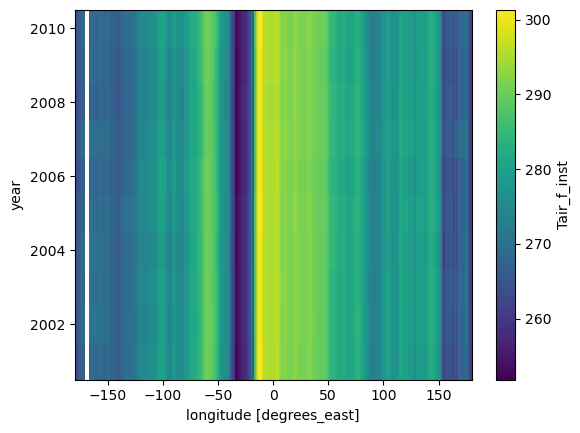

In [19]:
#气温随年份和经度变化
temperature_year.mean(dim='lat').plot()

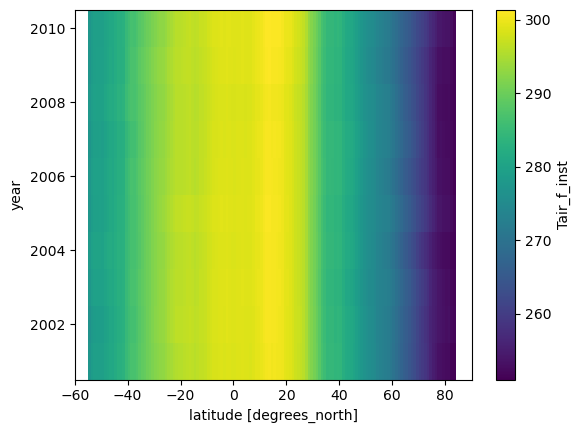

In [20]:
#气温随年份和纬度变化
temperature_year.mean(dim='lon').plot()

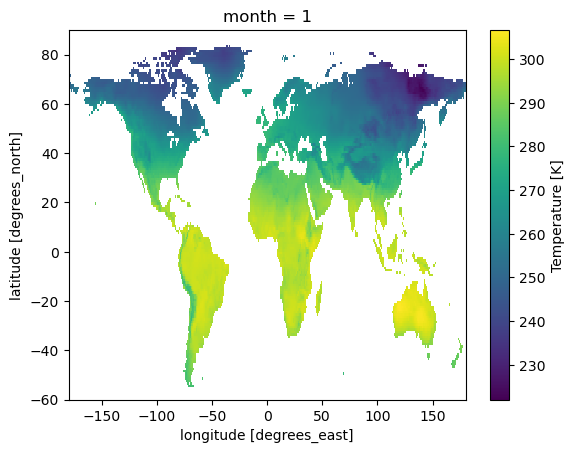

In [24]:
#2001-2010年一月份平均温度分布
temperature_mon.mean().sel(month=1).plot()

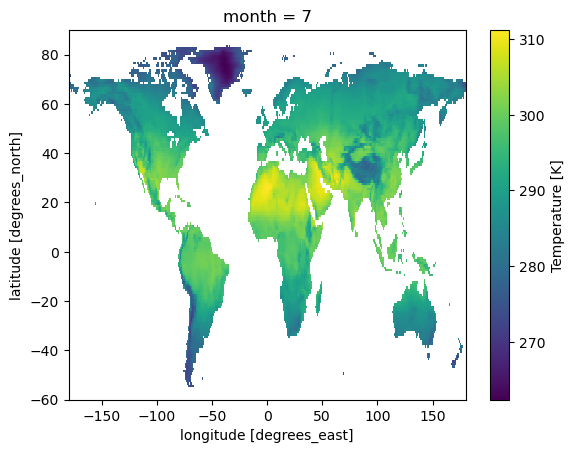

In [25]:
#2001-2010年七月份平均温度分布
temperature_mon.mean().sel(month=7).plot()